- Authors: Ray Donner and Seth Johnson
- Date: May 25, 2023
- Content: This file is a conglomerate of all the machine learning algorithms that we run and collect data on. This will include the following algorithms:
    - Categorical Naive-Bayes
    - Support Vector Machines
    - Decision Trees
    - Neural Network
    - Convolutional Neural Network
- The goal is to analyze this with our new dataset COVID19_APK_Data_06-2023.csv and compare train/test performace, as well as provide statistical analysis to compare COVIDMalware.pdf dataset to ours.

For Google Drive

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/2023_REU_Workspace

print(os.getcwd())

RUN ME FIRST

In [1]:
"""
### Package handling
"""
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pylab as pl
import random
from pprint import pprint

"""
### Site for Tensorflow reference: https://www.tensorflow.org/guide/distributed_training
"""

models = {
    "Categorical NB": {
        "Epoch_duration": [20],
        "duration": 1,
        "history": 0 # model.fit().history.items()
    },
    "SVM": {
        "Epoch_duration": [20],
        "duration": 1,
        "history": 0
    },
    "dTree": {
        "Epoch_duration": [20],
        "duration": 1,
        "history": 0
    },
    "DNN": {
        "Epoch_duration": [20],
        "duration": 1,
        "history": 0
    },
    "CNN": {
        "Epoch_duration": [20],
        "duration": 1,
        "history": 0
    },
}

"""
### Preprocessing
"""

keys = [] # Lables of CSV data that is NOT the permissions requested by a given APK file
benignSpread = [] # permission spread requested by benign APK files
maliciousSpread = [] # permission spread requested by APK files flagged by AV software

print(os.getcwd()) # Displaying script's CWD

apkData = pd.read_csv("COVID19_APK_Data_06-2023.csv") # Calling CSV and filling DataFrame (DF)

"""
### Scraping our CSV's DF
"""
# Building keys array for parsinng reference later
for i in range(6):
    keys.append(apkData.keys()[i])

# print(keys)

permKeys = apkData.loc[0].keys().drop(i for i in keys).values # Key values for the permissions requested by a given APK file. This is for reference for our features array
permKeys = np.insert(permKeys, 0, "AV Rank") # Including AV Rank to permSpread
# print(permSpread)
apks = apkData["APK File"].values # Pulling APK files to correlate labels
avRanks = apkData["AV Rank"].values # pulls AV Rank from csv DF
labels = [1 if i > 0 else 0 for i in avRanks] # builds an array of malware classification based off avRank

perms = [apkData.loc[i].drop((i for i in keys)).values for i in range(len(apkData))] # Genereating features array that drops first 6 columns to include the total permissions requested, followed by the PermSpread
# Prepending AV Rank to each sub-array in perms
for i in range(len(perms)):
    perms[i] = np.insert(perms[i], 0, avRanks[i])

# print(f"length of apks array: {len(apks)}")
# print(f"length of perms array: {len(perms)}")
# print(f"length of labels array: {len(labels)}")

# print(f"length of permissions in subarray: {len(perms[0])}")
# print(permSpread)
# print(f"length of permSpread: {len(permSpread)}")
# print(f"total length of labels: {len(apkData.keys())}")

# Writes a structured output to a file of all data parsed out of csv's DF
# with open("stupid.txt", "w") as outFile:
#     for i in range(len(apks)):
#         outFile.write("Application: " + apkData.loc[i].loc["Application Name"] + "\n")
#         outFile.write("Package: " + apkData.loc[i]["Package Name"] + "\n")
#         outFile.write(f"APK File: {apks[i]}" + "\n")
#         outFile.write(f"AV Rank: {avRanks[i]}" + "\n")
#         outFile.write(f"Total Permissions Requested: {sum(perms[i][2:])}" + "\n")
#         outFile.write(f"Permission Spread: {perms[i]}" + "\n")
#         outFile.write("\n")

apps = {}

# pprint(apps)

print("### CONSOLE: Preprocessing complete...")

/home/sdj81/PyWorkspace/2023_REU_Workspace
### CONSOLE: Preprocessing complete...


Statistics for our Dataset

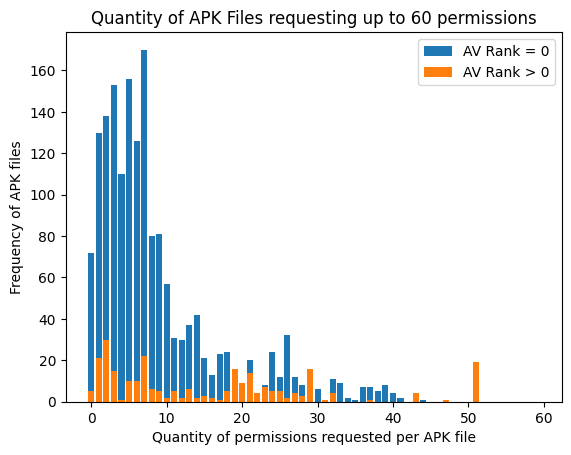

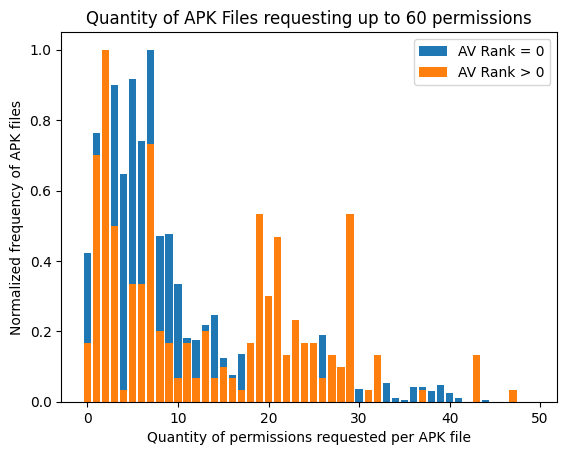

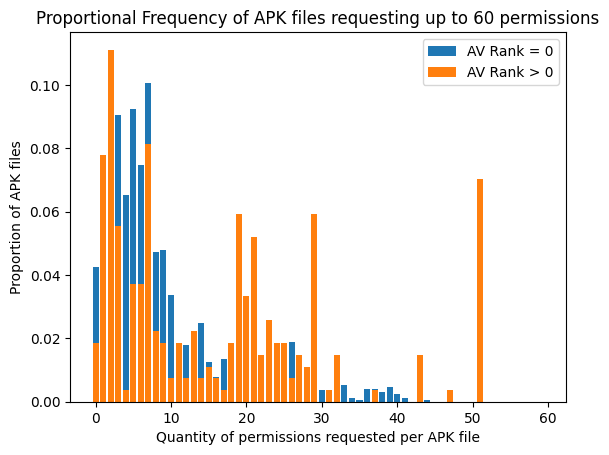

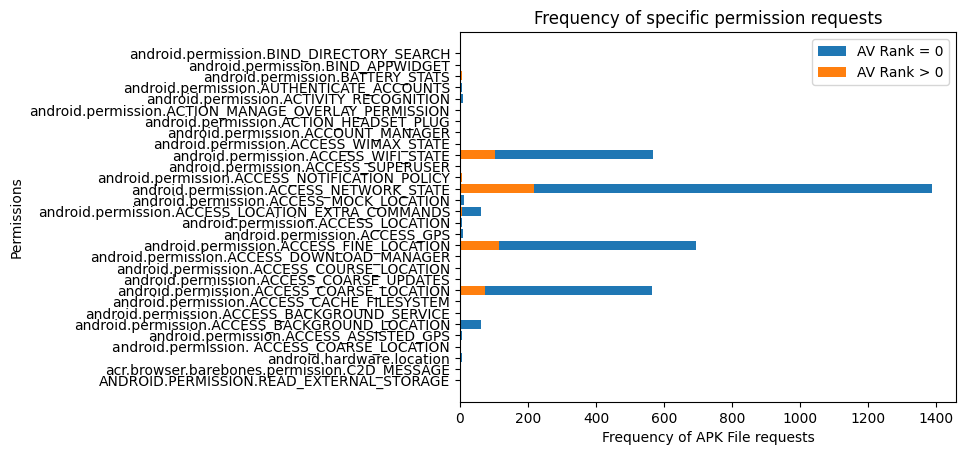

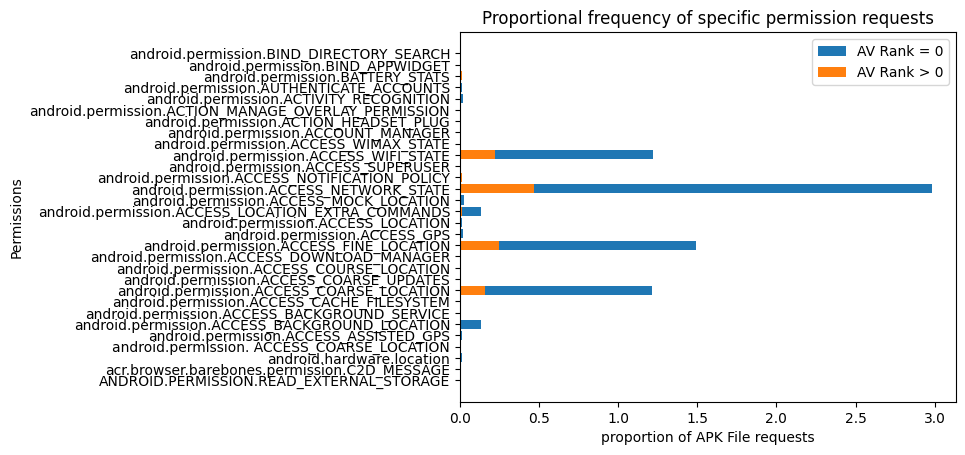

We analyzed 1959 APKs
Out of that, 270 were flagged as malicious. This is according to the dataset provided by Wang et al 2021.
Which means about 13.78% of all analyzed APKs are labeled as malicious.


In [2]:
# TODO:
# - Percentage of malicious APKs wrt to dataset
# - Percentage of APKs that failed analysis
# - percentage of apps that are malicious
# - percentage of apps that failed analysis
# - Std Dev, Std Err to compare my processed data with the data provided by COVIDMalware.pdf
#      - might be useful to includ metric of apks that failed analysis
#      - this can help confirm that what I did was right
#      - Check Stats 305 stuff to provide formulas and context for these values
# - normalize, proportionalize data to plot
# - Plot the data I've collected
#   - Compare total requested per apk
#   - compare types of perms requested per apk
#   - Compare how many apps requested how many permissions --> TODO
#   - F.E: Compare benign vs malicious

"""
### Plotting the total permissions requested by a given apk, organized based off an AV rank > 0
"""
# print(f"Length of unmodified perms array: {len(perms)}")
# print(perms[0])
permSpread = [perms[i][2:] for i in range(len(perms))]
# pprint(permSpread[0])
# print(f"Length of apks: {len(apks)}")
# print(f"Length of modified perms array: {len(permSpread)}")

# Sorting the permission spread between malicious and benign
for i in range(len(apks)):
    if labels[i] > 0:
        # print(f"APK File {apks[i]} is malicious!")
        maliciousSpread.append(permSpread[i])
    else:
        benignSpread.append(permSpread[i])

# print(maliciousSpread)

maliciousSpread_sums = [sum(i) for i in maliciousSpread]
benignSpread_sums = [sum(i) for i in benignSpread]

# plt.bar([i for i in range(len(benignSpread_sums))], benignSpread_sums, label="AV Rank = 0")
# plt.bar([i for i in range(len(maliciousSpread_sums))], maliciousSpread_sums,label="AV Rank > 0")
# plt.xlabel("APK File")
# plt.ylabel("Quantity of requested permissions")
# plt.title("Total number of permissions requested for a given APK file.")
# plt.legend()
# plt.savefig("TotalPermissionsGraphed.png", dpi=300, bbox_inches = "tight")

"""
### Plotting how many apps requested a given quantity of permissions
"""
# print(f"The most permissions requested by any given Malicious APK file: {max(maliciousSpread_sums)}")
# print(f"The most permissions requested by any given benign APK file: {max(benignSpread_sums)}")

x = [i for i in range(max(maliciousSpread_sums) + 1)] if maliciousSpread_sums > benignSpread_sums else [i for i in range(max(benignSpread_sums) + 1)]
# print(f"Array of quantity of permissions: {x}")

yBenign = [0 for _ in range(len(x))]
yMalicious = [0 for _ in range(len(x))]

for i in benignSpread_sums:
    # print(f"sum of permSread for Bening apks: {i}")
    # print(f"x index: {x[i]}")
    yBenign[i] += 1

for i in maliciousSpread_sums:
    # print(f"sum of permSread for Malicious apks: {i}")
    # print(f"x index: {x[i]}")
    yMalicious[i] += 1

# print(len(maliciousSpread_sums))
# print(len(benignSpread_sums))

# print(yBenign)
# print(yMalicious)

# The following is ugly please don't stare at it for too long

# Representing Frequency
# plt.bar(x, yBenign, label="AV Rank = 0")
# plt.bar(x, yMalicious, label="AV Rank > 0")
# plt.title("Quantity of APK Files requesting a given quantity of permissions")
# plt.xlabel("Quantity of permissions requested per APK file")
# plt.ylabel("Frequency of APK files")
# plt.legend()
# plt.savefig("FreqPermSpreadTotal.png", dpi=300, bbox_inches = "tight")
# plt.show()

# Representing Frequency of up to 60 permissions requested
plt.bar(x[:60], yBenign[:60], label="AV Rank = 0")
plt.bar(x[:60], yMalicious[:60], label="AV Rank > 0")
plt.title("Quantity of APK Files requesting up to 60 permissions")
plt.xlabel("Quantity of permissions requested per APK file")
plt.ylabel("Frequency of APK files")
plt.legend()
# plt.savefig("FreqPermSpread60.png", dpi=300, bbox_inches = "tight")
plt.show()

# ...Normalized
# plt.bar(x, [i / max(yBenign) for i in yBenign], label="AV Rank = 0")
# plt.bar(x, [i / max(yMalicious) for i in yMalicious], label="AV Rank > 0")
# plt.title("Quantity of APK Files requesting a given quantity of permissions")
# plt.xlabel("Quantity of permissions requested per APK file")
# plt.ylabel("Normalized frequency of APK files")
# plt.legend()
# plt.savefig("NormPermSpreadTotal.png", dpi=300, bbox_inches = "tight")
# plt.show()

# ...Normalized for up to 60 permissions
plt.bar(x[:50], [i / max(yBenign) for i in yBenign[:50]], label="AV Rank = 0")
plt.bar(x[:50], [i / max(yMalicious) for i in yMalicious[:50]], label="AV Rank > 0")
plt.title("Quantity of APK Files requesting up to 60 permissions")
plt.xlabel("Quantity of permissions requested per APK file")
plt.ylabel("Normalized frequency of APK files")
plt.legend()
# plt.savefig("NormPermSpread60.png", dpi=300, bbox_inches = "tight")
plt.show()

# ...Proportioned based on the quantity of benign/malicious APKs respectively
# plt.bar(x, [i / len(benignSpread) for i in yBenign], label="AV Rank = 0")
# plt.bar(x, [i / len(maliciousSpread) for i in yMalicious], label="AV Rank > 0")
# plt.title("Quantity of APK Files requesting a given quantity of permissions")
# plt.xlabel("Quantity of permissions requested per APK file")
# plt.ylabel("Proportion of APK files")
# plt.legend()
# plt.savefig("PropPermSpreadTotal.png", dpi=300, bbox_inches = "tight")
# plt.show()

# ...and the first 60 of the porportional representation
# Limit to only default Android OS permissions 
plt.bar(x[:60], [i / len(benignSpread) for i in yBenign[:60]], label="AV Rank = 0")
plt.bar(x[:60], [i / len(maliciousSpread) for i in yMalicious[:60]], label="AV Rank > 0")
plt.title("Proportional Frequency of APK files requesting up to 60 permissions")
plt.xlabel("Quantity of permissions requested per APK file")
plt.ylabel("Proportion of APK files")
plt.legend()
# plt.savefig("PropPermSpread60.png", dpi=300, bbox_inches = "tight")
plt.show()

"""
### Plotting the frequency of requests FE permission found during analysis
"""

benignPerms = [0 for _ in range(len(permKeys))]
maliciousPerms = [0 for _ in range(len(permKeys))]

for i in (range(len(apks))):
    if labels[i] > 0:
        for j in range(len(permSpread[i])):
            maliciousPerms[j] += permSpread[i][j]
    else:
        for j in range(len(permSpread[i])):
            benignPerms[j] += permSpread[i][j]

# Frequency of applications requesting a given permission
plt.barh(permKeys[2:32], benignPerms[:30], label="AV Rank = 0")
plt.barh(permKeys[2:32], maliciousPerms[:30], label="AV Rank > 0")
plt.title("Frequency of specific permission requests")
plt.xlabel("Frequency of APK File requests")
plt.ylabel("Permissions")
plt.legend()
plt.savefig("FreqPerPermType.png", dpi=300, bbox_inches = "tight")
plt.show()

# proportion of applications requesting a given permission
plt.barh(permKeys[2:32], [i / len(benignPerms) for i in benignPerms[:30]], label="AV Rank = 0")
plt.barh(permKeys[2:32], [i / len(maliciousPerms) for i in maliciousPerms[:30]], label="AV Rank > 0")
plt.title("Proportional frequency of specific permission requests")
plt.xlabel("proportion of APK File requests")
plt.ylabel("Permissions")
plt.legend()
plt.savefig("PropPerPermType.png", dpi=300, bbox_inches = "tight")
plt.show()

# How many APKs are malicious?
totalAPKs = len(apks)
totalBadAPKs = sum([1 if item > 0 else 0 for item in labels])

print(f"We analyzed {totalAPKs} APKs")
print(f"Out of that, {totalBadAPKs} were flagged as malicious. This is according to the dataset provided by Wang et al 2021.")
print(f"Which means about {((totalBadAPKs / totalAPKs) * 100):.2f}% of all analyzed APKs are labeled as malicious.")

Scikit Learn prep

In [9]:
"""
### Package handling
"""
from sk learn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # importing the Classifier module specifically
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold

"""
### FOLDS DECLARATION
- Modify this value if we wanna change how many iterations our models go through
    - this will change the size of masterTrain and masterTest arrays, hence changing how many times each model iterates through these folds
"""
folds = 5

"""
### train_test_split()
"""

# xTrain, xTest, yTrain, yTest = train_test_split(features, labels, random_state=0, test_size=0.2)


"""
### K-FOLD CROSS-VALIDATION
- This might be more useful than doing things manually: https://scikit-learn.org/stable/modules/cross_validation.html
    - compare with the current manual split
- IMPROVE WITH SMOTE
"""
masterTrain = []
masterTest = []

kf = KFold(n_splits=folds, random_state=0, shuffle=True) # declaring KFold object

### DEBUG
dTree = DecisionTreeClassifier() # Declaring decision tree classifier

for i, (trainIndx, testIndx) in enumerate(kf.split(perms, labels)):
    # print(trainIndx)
    # print(testIndx)
    
    xTrain = [perms[i] for i in trainIndx]
    xTest = [perms[i] for i in testIndx]
    yTrain = [labels[i] for i in trainIndx]
    yTest = [labels[i] for i in testIndx]
    
    masterTrain.append((xTrain, yTrain))
    masterTest.append((xTest, yTest))

    # print(f"iteration {i + 1}")
    # print(f"Size of training features: {len(xTrain)}")
    # print(f"Size of training labels: {len(yTrain)}")
    # print(f"Size of testing features: {len(xTest)}")
    # print(f"Size of testing labels: {len(yTest)}")
    # print()

### verifying partition sizes prior to executing the next sections

# print(f"Total size of masterTrain: {len(masterTrain)}")
# print(f"Total size of masterTest: {len(masterTest)}")

# print(f"Size of an element in masterTrain: {len(masterTrain[0])}")
# print(f"Size of an element in masterTest: {len(masterTest[0])}")

# print(f"Type of element in masterTrain: {type(masterTrain[0])}")
# print(f"Type of element in masterTest: {type(masterTest[0])}")

# print(f"Size of features element in masterTrain tuple: {len(masterTrain[0][0])}")
# print(f"Size of labels element in masterTrain tuple: {len(masterTrain[0][1])}")

# print(f"Size of features element in masterTest tuple: {len(masterTest[0][0])}")
# print(f"Size of labels element in masterTest tuple: {len(masterTest[0][1])}")

print("### CONSOLE: SciKit Learn preperation complete...")

### CONSOLE: SciKit Learn preperation complete...


Categorical Naive-Bayes

In [ ]:
"""
### NOTES:
- clfNB.predict() throws the following errors:
    - IndexError: index 1 is out of bounds for axis 1 with size 1
    - Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
- I suspect this has to do with the xTrain and xTest sizes differing, but that defeats the purpose of unbalanced splits
    - applied in areas such as KF C-V (It throws the same error when I try it with that tactic as well...)
    - Training goes off without a hitch, which supports my theory
        - DTrees and SVM also work just fine...........
- Carlos Gonzalez gave me an idea to check the datatype being passed to the predict function, and see about the possibility of using a DF
"""

clfNB = CategoricalNB() # Calling Categorical Naive-Bayes classifier

# K-Fold Cross-Validation iteration
for i in range(folds):
    xTrain = masterTrain[i][0]
    yTrain = masterTrain[i][1]

    xTest = masterTest[i][0]
    yTest = masterTest[i][1]

    """
    ### Training
    """
    t0 = time.time()
    clfNB.fit(xTrain, yTrain) # Train
    print(f"Training time: {(time.time() - t0):.3f} s") # Mark training time

    """
    ### Testing
    """
    t0 = time.time()
    prediction = clfNB.predict(xTest) # Predicting
    print(f"Prediction Time: {(time.time() - t0):.3f} s") # marking prediction time
    
    """
    ### Metrics
    """
    print(f"Prediction accuracy: {(accuracy_score(prediction, yTest) * 100):.2f}%")


Support Vector Machines

In [ ]:
"""
### NOTES:
- linear kernel reports 100% accuracy, which makes me think it's sucky
- haven't tried Regularization param, or gamma coefficient yet.
- Wonder if GridSearchCV might work for this....
"""
clfSVC = SVC(kernel="poly", C=5, gamma='scale')

for i in range(folds):
    print(f"### Iteration: {i + 1} ###")
    xTrain = masterTrain[i][0]
    yTrain = masterTrain[i][1]

    xTest = masterTest[i][0]
    yTest = masterTest[i][1]
    """
    ### Training
    """
    t0 = time.time()
    clfSVC.fit(xTrain, yTrain)
    print(f"Training time: {(time.time() - t0):.3f} s") # Mark training time

    """
    ### Testing
    """
    prediction = clfSVC.predict(xTest)
    print(f"Prediction Time: {(time.time() - t0):.3f} s") # marking prediction time
    
    """
    ### Metrics
    """
    confusion = confusion_matrix(yTest, prediction)
    print(f"Prediction accuracy: {(accuracy_score(prediction, yTest) * 100):.2f}%")
    print(f"Confusion Matrix:\n{confusion}")
    print()

    print("Maliciousness")
    print(f"True Positives: {confusion[1][1]}")
    print(f"False Positives: {confusion[1][0]}")
    print(f"False Negatives: {confusion[0][1]}") # --> MINIMIZE THIS VALUE
    print(f"Total Recall B): {(confusion[1][1] / sum(confusion[1])):.2f}")
    print(f"Percision: {(confusion[1][1] / sum([confusion[r][1] for r in range(len(confusion))])):.2f}")
    print()

Decision Trees

In [ ]:
"""
### NOTES
- K-Fold Cross-Validation returns an accuracy of 100%, which is quite sus my dood
    - tried with train_test_split(), same problem
- Manually partitioning the datasets prodouce a reasonable accuracy value...
- REALLY ODD MY GUY
"""

"""
### Manual partitioning
"""
xTrain = []
yTrain = []
xTest = []
yTest = []

x = shuffle(perms, random_state=0)

for i in range((2 * len(x)) // 3):
    xTrain.append(x[i])
    yTrain.append(labels[i])

for i in range((2 * len(x)) // 3, len(x)):
    xTest.append(x[i])
    yTest.append(labels[i])

# print(len(xTrain))
# print(len(yTrain))
# print(len(xTest))
# print(len(yTest))



"""
### Train
"""
# t0 = time.time()
# dTree.fit(xTest, yTest)
# print(f"Training time: {(time.time() - t0):.3f} s") # Mark training time

"""
### Test
"""
# t0 = time.time()
# prediction = dTree.predict(xTest)
# print(f"Prediction Time: {(time.time() - t0):.3f} s") # marking prediction time

"""
### Metrics
"""
# confusion = confusion_matrix(yTest, prediction)
# print(f"Prediction accuracy: {(accuracy_score(prediction, yTest) * 100):.2f}%")
# print(f"Confusion Matrix:\n{confusion}")
# print()

# print("0 = Benign")
# print(f"True Positives: {confusion[0][0]}")
# print(f"False Positives: {confusion[0][1]}") # --> MINIMIZE THIS VALUE
# print(f"False Negatives: {confusion[1][0]}")
# print(f"Total Recall B): {(confusion[0][0] / sum(confusion[0]))}")
# print(f"Percision: {(confusion[0][0] / sum([confusion[r][0] for r in range(len(confusion))])):.2f}")
# print()

# print("Maliciousness")
# print(f"True Positives: {confusion[1][1]}")
# print(f"False Positives: {confusion[1][0]}")
# print(f"False Negatives: {confusion[0][1]}") # --> MINIMIZE THIS VALUE
# print(f"Total Recall B): {(confusion[1][1] / sum(confusion[1]))}")
# print(f"Percision: {(confusion[1][1] / sum([confusion[r][1] for r in range(len(confusion))]))}")

### K-Fold Cross-Validation
for i in range(folds):

    print(f"### Iteration: {i + 1} ###")

    xTrain = masterTrain[i][0]
    yTrain = masterTrain[i][1]

    xTest = masterTest[i][0]
    yTest = masterTest[i][1]

    dTree = DecisionTreeClassifier() # a way to flush the DTree data b4 the next fold?

    """
    ### Train
    """
    t0 = time.time()
    dTree.fit(xTest, yTest) # want to retrain rather than improve itself
    print(f"Training time: {(time.time() - t0):.3f} s") # Mark training time

    """
    ### Test
    """
    t0 = time.time()
    prediction = dTree.predict(xTest)
    print(f"Prediction Time: {(time.time() - t0):.3f} s") # marking prediction time

    """
    ### Metrics
    """
    confusion = confusion_matrix(yTest, prediction)
    print(f"Prediction accuracy: {(accuracy_score(prediction, yTest) * 100):.2f}%")
    print(f"Confusion Matrix:\n{confusion}")
    print()

    print("Maliciousness")
    print(f"True Positives: {confusion[1][1]}")
    print(f"False Positives: {confusion[1][0]}")
    print(f"False Negatives: {confusion[0][1]}") # --> MINIMIZE THIS VALUE
    print(f"Total Recall B): {(confusion[1][1] / sum(confusion[1])):.2f}")
    print(f"Percision: {(confusion[1][1] / sum([confusion[r][1] for r in range(len(confusion))])):.2f}")
    print()

Neural Network Prep

In [ ]:
"""
### Package handling
"""
import tensorflow as tf
import keras
from keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
    Embedding,
    LSTM
)
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import utils
from keras.models import Sequential

"""
### Can we use the GPU?
"""

if tf.test.gpu_device_name():
    print(f'GPU installed. Good Job!\nGPU Device: {tf.test.gpu_device_name()}')
else:
    print(" No GPU found that can run TF.")

"""
### Overridden callback class "timer" for catching epoch/total time
"""
class timer(keras.callbacks.callbacks):
    import time
    def __init__(self): # initalized callback
        super(timer, self).__init__() # remember inheritance from OOP

    # training methods
    def on_train_begin(self, logs=None):
        self.start_train=time.time()
    def on_train_end(self, logs=None):
        stop_train = time.time()
        train_duration = stop_train - start_train
        # Calculates metrics
        tr_hours = tr_duration // 3600
        tr_minutes = (tr_duration - (hours * 3600)) // 60
        tr_seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        # Generates message of string
        msg = f"Elapsed time: {str(tr_hours)}:{str(tr_minutes)}:{str(tr_seconds)}"
        print(msg)
    
    # batch training methods <-- might not need this
    def on_train_batch_begin(self, batch, logs=None):
        pass
    def on_train_batch_end(self, batch, logs=None):
        pass

    # epoch methods
    def on_epoch_begin(self, epoch, logs=None):
        self.start_epoch = time.time()
    def on_epoch_end(self, epoch, logs=None):
        stop_epoch = time.time()
        epoch_duration = stop_epoch - start_epoch
        msg = f"Epoch {epoch + 1} trained for {epoch_duration} seconds"
        print(msg)

    # prediction methods <-- this might be useful in the long run during CrossVal
    def on_predict_begin(self, logs=None):
        pass
    def on_predict_end(self, logs=None):
        pass

Visualizing performance

In [ ]:
"""
### Visualizing model performace
- I like the idea of visualizing our confusion matrix
  - use that to also visualize performance per K-fold iteration
- compare average values across all models
  - Train/Test: F1, accuracy, Recall, percision, time
- I can't remember the how else Dr Perez wants to compare data
"""
for val, data in history.history.items():
  plt.plot(data)
  plt.title(val)
  plt.show()
  print()